In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
# Assuming a workspace with:
#   src/tracetools_analysis/
#   src/ros-tracing/ros2_tracing/tracetools_read/
sys.path.insert(0, '../')
sys.path.insert(0, '../../../ros-tracing/ros2_tracing/tracetools_read/')
import numpy as np
import pandas as pd
# import datetime as dt


In [9]:
from tracetools_analysis.ros_model import ApplicationFactory

In [10]:
path = '~/.ros/tracing/session-20211123210110/ust'
# architecture_path = './architecture.json.back'
architecture_path = './architecture.json'

In [12]:
app = ApplicationFactory.create(architecture_path)
# app = ApplicationFactory.create(path)

AttributeError: type object 'ApplicationFactory' has no attribute 'create'

In [6]:
app.import_trace(path)

NameError: name 'app' is not defined

In [7]:
import matplotlib.pyplot as plt

In [8]:
def label(path):
    return 'max: {} ms, {}'.format(path.max_ms, path.name)

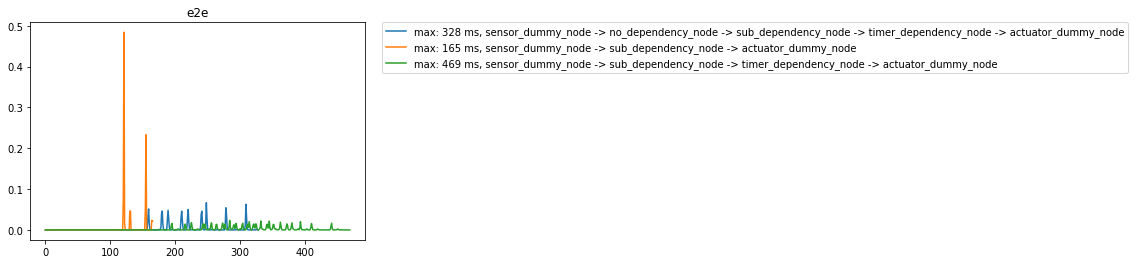

In [9]:
plt.title('e2e')
for path in app.paths:
    plt.plot(path.hist.raw, label=label(path))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

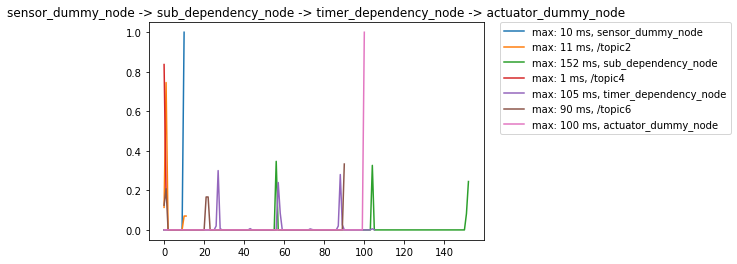

In [10]:
path = app.paths[2]
plt.title(path.name)
for child in path.child:
    plt.plot(child.hist.raw, label=label(child))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

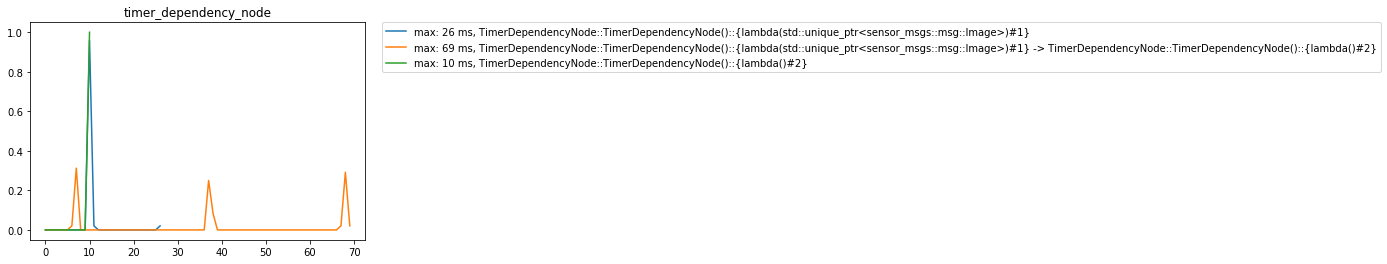

In [11]:
node = path.child[4]
plt.title(node.name)
for child in node.child:
    plt.plot(child.hist.raw, label=label(child))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)